In [31]:
#!pip install seaborn
#!pip install scipy
#!pip install statsmodels

In [32]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import train_test_split

import scipy.stats as stats
import scipy as sp


import statsmodels.api as sm

from IPython.display import display, display_html, Markdown

In [33]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [34]:
df = pd.read_csv('Lab3.csv', sep='\t')

df.head(20)

,t,y,x1,x2
0,1,130,1100,2000
1,2,230,1900,1400
2,3,180,1300,1200
3,4,140,1400,800
4,5,110,1100,1000
5,6,120,1700,600
6,7,270,2300,1600
7,8,190,1100,1500
8,9,150,1300,800
9,10,210,2000,1700


In [59]:
y = df['y']
X = df.drop(['y', 't'], axis=1)

k = 3
n = len(df.index)

X = sm.add_constant(X)
display(X)
est = sm.OLS(y, X)
est2 = est.fit()
est2.summary()

,const,x1,x2
0,1.0,1100,2000
1,1.0,1900,1400
2,1.0,1300,1200
3,1.0,1400,800
4,1.0,1100,1000
5,1.0,1700,600
6,1.0,2300,1600
7,1.0,1100,1500
8,1.0,1300,800
9,1.0,2000,1700


c:\python38\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     9.405
Date:                Mon, 26 Oct 2020   Prob (F-statistic):            0.00793
Time:                        18:04:56   Log-Likelihood:                -51.381
No. Observations:                  11   AIC:                             108.8
Df Residuals:                       8   BIC:                             110.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.6258     43.180     -0.223      0.829    -109.198      89.947
x1             0.0833      0.024      3.494      0.008       0.028       0.138
x2             0.0445      0.022      1.982      0.083      -0.007       0.096
==============================================================================
Omnibus:                        0.871   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.650
Skew:                          -0.193   Prob(JB):                        0.722
Kurtosis:                       1.873   Cond. No.                     9.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
tval = pd.DataFrame({"params" : ["const", "x1", "x2"] , 
        "t" : [ i for i in est2.tvalues],
        "se" : [ i for i in est2.bse] })
tned = pd.DataFrame({"gamma" : [0.9, 0.95, 0.99]})\
    .assign(t = lambda x: stats.t.ppf(1 - (1 - x.gamma) / 2, 20 - 3 - 1))\
    .assign(f = lambda x: stats.f.ppf(x.gamma, 3 + 1, 20 - 3 - 1))

tlvl = pd.DataFrame({"gamma" : [0.9, 0.95, 0.99]})

for p in ['const', 'x1', 'x2']:
    left = []
    right = []
    for g in 0, 1, 2:
        left.append(est2.params[p] - tned.f[g] * est2.bse[p] * math.sqrt(n / (n - k - 1)))
        right.append(est2.params[p] + tned.f[g] * est2.bse[p] * math.sqrt(n / (n - k - 1)))
    tlvl[p + "_left"] = pd.Series(left, index=tlvl.index)
    tlvl[p + "_right"]= pd.Series(right, index=tlvl.index)

display(Markdown("F test = {}".format(est2.fvalue)))
display_side_by_side(tval, tned, tlvl)

F test = 9.404622503787726

params 
 t 
 se 
 
 
 
 
 0 
 const 
 -0.222925 
 43.179674 
 
 
 1 
 x1 
 3.494470 
 0.023848 
 
 
 2 
 x2 
 1.981535 
 0.022461 
 
 
 
 
 
 
 gamma 
 t 
 f 
 
 
 
 
 0 
 0.90 
 1.745884 
 2.332745 
 
 
 1 
 0.95 
 2.119905 
 3.006917 
 
 
 2 
 0.99 
 2.920782 
 4.772578 
 
 
 
 
 
 
 gamma 
 const_left 
 const_right 
 x1_left 
 x1_right 
 x2_left 
 x2_right 
 
 
 
 
 0 
 0.90 
 -135.894020 
 116.642342 
 0.013598 
 0.153072 
 -0.021174 
 0.110187 
 
 
 1 
 0.95 
 -172.386019 
 153.134341 
 -0.006556 
 0.173226 
 -0.040156 
 0.129169 
 
 
 2 
 0.99 
 -267.958737 
 248.707059 
 -0.059340 
 0.226010 
 -0.089869 
 0.178882

**F тест значительно больше для для всех gamma, следовательно регрессия имеет статистическую значимость.**

In [73]:
display(Markdown("Для X1 = 1500 и X2 = 1800 y = {}".format(est2.predict([1.0, 1500, 1800])[0])))
display(Markdown("При увеличенни х1 на 500 у увеличится на {}".format(est2.params.x1 * 500)))
display(Markdown("При увеличенни х1 на 300 и x2 на 500 у увеличится на {}".format(est2.params.x2 * 500 + est2.params.x1 * 300)))

Для X1 = 1500 и X2 = 1800 y = 195.48830239198662

При увеличенни х1 на 500 у увеличится на 41.66754611049626

При увеличенни х1 на 300 и x2 на 500 у увеличится на 47.25372306263547

In [93]:
Xnew = df.drop(['y', 't'], axis=1)
Xnew.x1 = Xnew.x1 * 1.1
Xnew = sm.add_constant(Xnew)
y_new = est2.predict(Xnew)
y_old = est2.predict(X)
display(Markdown("Если x1 увеличить на 10 %, то y увеличиться на {} %".format(np.mean((y_new / y_old) * 100 - 100))))


Если x1 увеличить на 10 %, то y увеличиться на 7.335799755156573 %

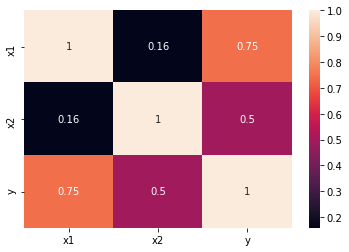

In [95]:
cols = ['x1', 'x2', 'y']
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True)